A2 de Linguagens de Programação – 30/11/2017
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [1]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Matheus Popst
Olá, Matheus Popst!
Bom trabalho!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
import re
import string
import time
import pymysql
import sqlite3
import getpass
import pandas.io.sql as psql
import networkx as nx
from IPython.display import clear_output
%matplotlib inline

Questão 1 (1,5 pontos)  


Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [4]:
df_tf = pd.read_excel('votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


In [65]:
conn = sqlite3.connect('votesurvey.sqlite')
cur = conn.cursor()

In [7]:
q='''
CREATE TABLE comovotadeputado(
id SMALLINT UNSIGNED AUTO_INCREMENT,
gender varchar(6),
age integer,
salary_before_stern integer,
expected_salary integer,
candidate varchar(10),
CONSTRAINT pk_person PRIMARY KEY (id));
'''
cur.execute(q)

In [19]:
p='''
INSERT INTO comovotadeputado VALUES(
9, 'Male', 26, 120000, 80000,'Bush');
'''
cur.execute(p)

In [18]:
p='''
INSERT INTO comovotadeputado VALUES(
8, 'Male', 26, 48000, 8000,'Bush');
'''
cur.execute(p)

In [17]:
p='''
INSERT INTO comovotadeputado VALUES(
7, 'Male', 30, 110000, 150000,'Bush');
'''
cur.execute(p)

In [16]:
p='''
INSERT INTO comovotadeputado VALUES(
6, 'Female', 24, 55000, 100000,'Bush');
'''
cur.execute(p)

In [15]:
p='''
INSERT INTO comovotadeputado VALUES(
5, 'Male', 32, 150000, 150000,'Bush');
'''
cur.execute(p)

In [12]:
p='''
INSERT INTO comovotadeputado VALUES(
4, 'Male', 27, 82000, 100000,'Bush');
'''
cur.execute(p)

In [11]:
p='''
INSERT INTO comovotadeputado VALUES(
3, 'Male', 26, 56000, 100000,'Bush');
'''
cur.execute(p)

In [10]:
p='''
INSERT INTO comovotadeputado VALUES(
2, 'Male', 27, 50000, 120000,'Bush');
'''
cur.execute(p)

In [9]:
p='''
INSERT INTO comovotadeputado VALUES(
1, 'Male', 30, 125000, 125000,'Bush');
'''
cur.execute(p)

In [8]:
p='''
INSERT INTO comovotadeputado VALUES(
0, 'Male', 27, 60000, 110000,'Bush');
'''
cur.execute(p)

In [20]:
p='''
SELECT * FROM
comovotadeputado;
'''
for row in cur.execute(p):
    print(row)

(0, 'Male', 27, 60000, 110000, 'Bush')
(1, 'Male', 30, 125000, 125000, 'Bush')
(2, 'Male', 27, 50000, 120000, 'Bush')
(3, 'Male', 26, 56000, 100000, 'Bush')
(4, 'Male', 27, 82000, 100000, 'Bush')
(5, 'Male', 32, 150000, 150000, 'Bush')
(6, 'Female', 24, 55000, 100000, 'Bush')
(7, 'Male', 30, 110000, 150000, 'Bush')
(8, 'Male', 26, 48000, 8000, 'Bush')
(9, 'Male', 26, 120000, 80000, 'Bush')


Questão 2 (1.5 ponto)  

Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  
c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  


In [279]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

In [42]:
q='''
SELECT name FROM sqlite_master WHERE type='table';
'''
for i in cur.execute(q):
    print(i)

('Iris',)


In [284]:
q='''
SELECT DISTINCT species FROM iris ;
'''
for i in cur.execute(q):
    print(i)

('Iris-setosa',)
('Iris-versicolor',)
('Iris-virginica',)


In [45]:
for i in cur.execute('PRAGMA table_info([Iris]);'):
    print(i)

(0, 'Id', 'INTEGER', 0, None, 1)
(1, 'SepalLengthCm', 'NUMERIC', 0, None, 0)
(2, 'SepalWidthCm', 'NUMERIC', 0, None, 0)
(3, 'PetalLengthCm', 'NUMERIC', 0, None, 0)
(4, 'PetalWidthCm', 'NUMERIC', 0, None, 0)
(5, 'Species', 'TEXT', 0, None, 0)


In [52]:
for i in cur.execute('SELECT COUNT(sp) FROM (SELECT DISTINCT Species as sp FROM Iris);'):
    print(i)

(3,)


In [53]:
for i in cur.execute('SELECT COUNT(sp) FROM (SELECT DISTINCT Id as sp FROM Iris);'):
    print(i)

(150,)


In [282]:
q='''
SELECT Species, PetalLengthCm as l, PetalWidthCm as h
FROM Iris
WHERE Species='Iris-setosa'
'''
setosa=[]
for i in cur.execute(q):
    setosa.append(i)
n=0
area=0
for petala in setosa:
    n=n+1
    area=area+petala[1]*petala[2]
media_setosa = area/n
media_setosa

0.36280000000000023

In [285]:
q='''
SELECT Species, PetalLengthCm as l, PetalWidthCm as h
FROM Iris
WHERE Species='Iris-versicolor'
'''
versicolor=[]
for i in cur.execute(q):
    versicolor.append(i)
n=0
area=0
for petala in versicolor:
    n=n+1
    area=area+petala[1]*petala[2]
media_versicolor = area/n
media_versicolor

5.7204

In [286]:
q='''
SELECT Species, PetalLengthCm as l, PetalWidthCm as h
FROM Iris
WHERE Species='Iris-virginica'
'''
virginancia=[]
for i in cur.execute(q):
    virginancia.append(i)
n=0
area=0
for petala in virginancia:
    n=n+1
    area=area+petala[1]*petala[2]
media_virginancia = area/n
media_virginancia

11.296199999999994

MAIOR ÁREA MÉDIA DE PÉTALAS: Iris-virginica

O Método de fazer é análogo para a maior área total entre pétalas e sépalas. Mas o tempo é escasso.

Questão 3 (3.0 pontos)

Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Quais o cliente (customers) que gastou em compras (invoices) o valor mais próximo do valor médio de compras?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas como chaves e uma lista dos álbuns respectivos como valores.
 

In [214]:
conn = sqlite3.connect('chinook.sqlite')
cur = conn.cursor()

LETRA A)

In [104]:
q = '''
SELECT dois.nome as nome, tracks.name
FROM
tracks
INNER JOIN
(SELECT um.nome as nome , invoice_items.TrackId as trackId
FROM
invoice_items
INNER JOIN
(SELECT customers.Firstname as nome, invoices.invoiceId as invoiceid
FROM
customers
INNER JOIN
invoices
WHERE
customers.CustomerId = invoices.CustomerId and customers.Firstname like 'L%') AS UM
WHERE
invoice_items.invoiceId = um.invoiceid) as dois
WHERE
tracks.trackid = dois.trackid
;
'''
for row in cur.execute(q):
    print(row)

('Luís', 'Experiment In Terra')
('Luís', 'Take the Celestra')
('Luís', 'Shout It Out Loud')
('Luís', 'Calling Dr. Love')
('Luís', 'Strutter')
('Luís', 'Cold Gin')
('Luís', 'Think About You')
('Luís', 'Rocket Queen')
('Luís', "Don't Cry (Original)")
('Luís', 'Back off Bitch')
('Luís', 'Garden of Eden')
('Luís', 'Coma')
('Luís', 'All Along The Watchtower')
('Luís', 'Karelia Suite, Op.11: 2. Ballade (Tempo Di Menuetto)')
('Luís', 'Fantasia On Greensleeves')
('Luís', 'Interlude Zumbi')
('Luís', 'Rios Pontes & Overdrives')
('Luís', 'Lixo Do Mangue')
('Luís', 'Podes Crer')
('Luís', 'A Cor Do Sol')
('Luís', 'Doutor')
('Luís', 'Linha Do Equador')
('Luís', 'TriboTchan')
('Luís', 'Reggae Tchan')
('Luís', 'Communication Breakdown(2)')
('Luís', 'Carolina Hard-Core Ecstasy')
('Luís', 'X-9 2001')
('Luís', 'Ipiranga 2001')
('Luís', 'Água de Beber')
('Luís', 'Vamo Batê Lata')
('Luís', 'Mensagen De Amor (2000)')
('Luís', 'Saber Amar')
('Luís', 'Cinema Mudo')
('Luís', 'Meu Erro')
('Luís', 'Será Que Vai 

LETRA B)

In [110]:
q='''
SELECT customers.FirstName, customers.lastname
FROM
customers
WHERE
customers.firstname like '%o%' and customers.lastname like '%o%';
'''
for row in cur.execute(q):
    print(row)

('John', 'Gordon')
('Robert', 'Brown')
('Joakim', 'Johansson')


LETRA C)

In [228]:
q = '''
select uma.a, uma.soma
from
(select tracks.name as a, sum(invoice_items.quantity) as soma, tracks.AlbumID as b
from invoice_items
inner join
tracks
ON tracks.TrackID = invoice_items.TrackID
group by tracks.TrackID
order by soma
desc) as uma
inner join
albums
ON uma.b = albums.AlbumID;
'''

In [229]:
A=[]
for i in cur.execute(q):
    A.append(i)
B=A
A=[]
for i in range(10):
    A.append(B[i])
A

[('Balls to the Wall', 2),
 ('Inject The Venom', 2),
 ('Snowballed', 2),
 ('Overdose', 2),
 ('Deuces Are Wild', 2),
 ('Not The Doctor', 2),
 ('Por Causa De Você', 2),
 ('Welcome Home (Sanitarium)', 2),
 ('Snowblind', 2),
 ('Cornucopia', 2)]

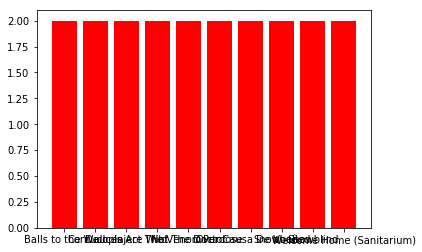

In [230]:
import numpy as np
import matplotlib.pyplot as plt

word = []
frequency = []

for i in range(len(A)):
    word.append(A[i][0])
    frequency.append(A[i][1])


plt.bar(word, frequency, color='r')
plt.show()

LETRA E)

In [224]:
q='''
select artists.name, albums.title
from albums
inner join artists
on albums.ArtistId = artists.ArtistId
'''
A=[]
for i in cur.execute(q):
    A.append(i)

In [209]:
B=dict()

In [210]:
for item in A:
    if item[0] not in B:
        B[item[0]]=[item[1]]
    else:
        B[item[0]].append(item[1])

In [211]:
B

{'AC/DC': ['For Those About To Rock We Salute You', 'Let There Be Rock'],
 'Aaron Copland & London Symphony Orchestra': ['A Copland Celebration, Vol. I'],
 'Aaron Goldberg': ['Worlds'],
 'Academy of St. Martin in the Fields & Sir Neville Marriner': ['The World of Classical Favourites'],
 'Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner': ['Sir Neville Marriner: A Celebration'],
 'Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair': ['Fauré: Requiem, Ravel: Pavane & Others'],
 'Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart': ['Bach: Orchestral Suites Nos. 1 - 4'],
 'Accept': ['Balls to the Wall', 'Restless and Wild'],
 'Adrian Leaper & Doreen de Feis': ['Górecki: Symphony No. 3'],
 'Aerosmith': ['Big Ones'],
 'Aisha Duo': ['Quiet Songs'],
 'Alanis Morissette': ['Jagged Little Pill'],
 'Alberto Turco & Nova Schola Gregoriana': ['Adorate Deum: Gregorian Chant from the Proper of the Mass'],
 'Alice I

Questão 4 (1.5 pontos) 

Ajude as funções abaixo (escrita em R) se tornarem mais eficientes (convertendo-as para Python):  
(faça o programa o mais próximo possível do original, sem procurar por programas semelhantes na web)

In [176]:
def cpf_gerar(x):
    def digitoverificador(x):
        x = str(x)
        dez = 10*int(str(x[0]))+9*int(str(x[1]))+8*int(str(x[2]))+7*int(str(x[3]))+6*int(str(x[4]))+5*int(str(x[5]))+4*int(str(x[6]))+3*int(str(x[7]))+2*int(str(x[8]))
        dez = 11 - (dez%11)
        if dez>=10:
            dez=0
        x = x + str(dez)
        onze = 11*int(str(x[0]))+10*int(str(x[1]))+9*int(str(x[2]))+8*int(str(x[3]))+7*int(str(x[4]))+6*int(str(x[5]))+5*int(str(x[6]))+4*int(str(x[7]))+3*int(str(x[8]))+2*int(str(x[9]))
        onze = 11 - (onze%11)
        if onze>=10:
            onze=0
        x = str(dez) + str(onze)
        return x
    x = str(x) + digitoverificador(x)
    x = x[0]+x[1]+x[2]+'.'+x[3]+x[4]+x[5]+'.'+x[6]+x[7]+x[8]+'-'+x[9]+x[10]
    return x

def verificarcpf(x):
    def digitoverificador(x):
        x = str(x)
        dez = 10*int(str(x[0]))+9*int(str(x[1]))+8*int(str(x[2]))+7*int(str(x[3]))+6*int(str(x[4]))+5*int(str(x[5]))+4*int(str(x[6]))+3*int(str(x[7]))+2*int(str(x[8]))
        dez = 11 - (dez%11)
        if dez>=10:
            dez=0
        x = x + str(dez)
        onze = 11*int(str(x[0]))+10*int(str(x[1]))+9*int(str(x[2]))+8*int(str(x[3]))+7*int(str(x[4]))+6*int(str(x[5]))+5*int(str(x[6]))+4*int(str(x[7]))+3*int(str(x[8]))+2*int(str(x[9]))
        onze = 11 - (onze%11)
        if onze>=10:
            onze=0
        x = str(dez) + str(onze)
        return x
    x = str(x)
    y = digitoverificador(x)
    if x[9]==y[0] and x[10]==y[1]:
        return True
    else:
        return False

In [179]:
cpf_gerar(452249798)

'452.249.798-97'

In [181]:
verificarcpf(45224979897)

True

Questão 5 (1.5 pontos) 

Por vezes precisamos passar mensagens secretas aos nossos colegas de classe. Converta o código abaixo para Python:    

In [182]:
def CAESAR(c, x):
    A="abcdefghijklmnopqrstuvwxyz"
    a = '' 
    l = len(x)
    for i in x:
        a = a + A[(A.index(i)+c) %26]
    return a    

In [ ]:
CAESAR(-5, 'utzhtyjrutuwfuwtaf')

Questão *"bônus"* (0,5 pontos)  

Converta o código abaixo para Python:  

In [116]:
def divisibleby (number, lista): #LISP RULES
    for i in lista:
        if number%i == 0:
            return True
    else:
        return False
def geradordeprimos(atual, maximovalor, listadeprimos):
    if atual==maximovalor:
        return listadeprimos
    else:
        if divisibleby(atual, listadeprimos):
            return geradordeprimos(atual+1, maximovalor, listadeprimos)
        else:
            listadeprimos.append(atual)
            return geradordeprimos(atual+1, maximovalor, listadeprimos)

In [117]:
geradordeprimos(3, 20, [2])

[2, 3, 5, 7, 11, 13, 17, 19]

Auto-avaliação (1 ponto)  
Escreva sua auto-avaliação (mínimo de 3 linhas) e atribua a esta um valor entre 0 e 1, levando em consideração o aproveitamento na disciplina.  

### Autoavaliação

Aprendi muito nesta disciplina, em particular a linguagem Python. No entanto, após a A1, admito que dei uma relaxada na disciplina, por conta de outros afazeres e coisas fundamentais, como o SQL, não dominei direito. Eu aprendi IntComp e LP com problemas os quais eu mesmo me desafiava e nesta último bimestre, apenas me desafiei com o LISP, o que é uma pena.

In [277]:
NOTA = random.random()
NOTA

0.7505978963684597